## Import 3rd party dependencies

In [928]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns

## Load training data

In [929]:
data = pd.read_csv("archive/train.csv")

In [930]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [931]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [932]:
data.shape

(2000, 21)

In [933]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [934]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [935]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Is the dataset balanced or imbalanced? 

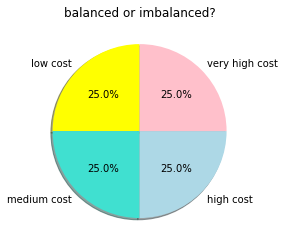

In [936]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()

### The correlation between features and target variable by plotting heatmap

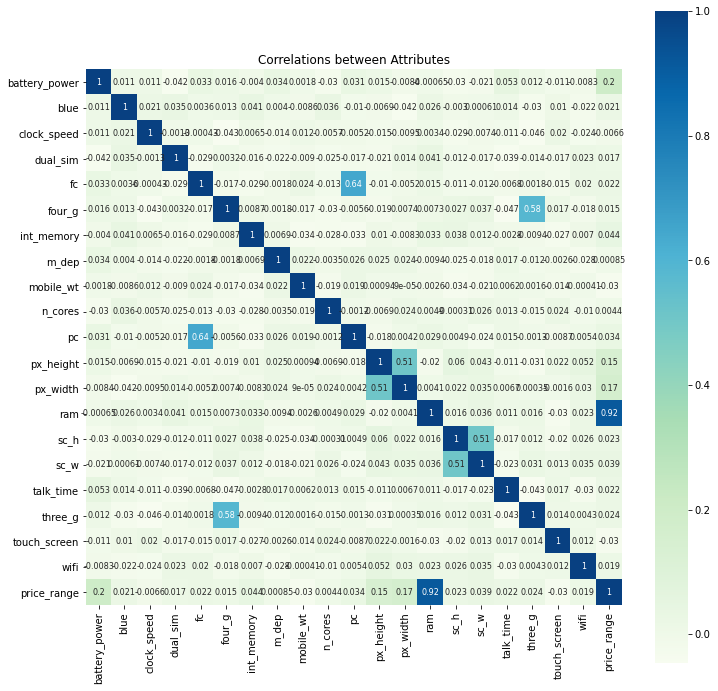

In [937]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

## Data Preprocessing

#### Convert labels into to two classes: low (0, 1) and high (2, 3)

In [938]:
data["price_classification"] = np.where(data["price_range"] <= 1, 0, 1)
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        188        2  ...       756  2549     9     7         19        0   
1        136        3  ...      1988  2631    17     3          7        1   
2        145        5  ...      1716  2603    11     2          9        1   
3        131        6  ...      1786  2769    16     8         11        1   
4        141        2  ...      1212  1411     8     2         15        1   

   touch_screen  wifi  price_range  price_classifi

#### Split the original ‘train.csv’ into ‘train.csv’, ‘valid.csv’ and ‘test.csv’ with the ratio of 0.8 : 0.1 : 0.1

In [939]:
x = data
y = data["price_range"]
train_data, tmp_x, train_y, tmp_y = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)
test_data, valid_data, test_y, valid_y = train_test_split(tmp_x, tmp_y, test_size = 0.5, random_state = 101, stratify = tmp_y)

#### Test whether the split works correctly

In [940]:
print(train_data.shape)
print(test_data.shape)
print(valid_data.shape)
print(train_data.head())

(1600, 22)
(200, 22)
(200, 22)
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1569           1494     0          2.4         0   6       1           3   
1668            962     0          1.0         1  14       0           2   
1989            586     0          2.8         0   2       0          15   
1609           1148     0          2.3         1   0       1          58   
1424           1352     0          2.4         0   5       1           6   

      m_dep  mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  \
1569    0.9         93        7  ...      1003  1208    14    13         17   
1668    0.9        125        1  ...      1916  1491    16     2         14   
1989    0.2         83        3  ...       854  2592    12     8          3   
1609    0.3        170        5  ...       688  3127    10     7         11   
1424    0.9         92        6  ...      1299  1309    12     1         14   

      three_g  touch_screen  wifi  pr

#### Write the data back to the csv file

In [941]:
train_data.to_csv("train.csv")
test_data.to_csv("test.csv")
valid_data.to_csv("valid.csv")

## Model Implementation

### The Sigmoid function

In [942]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Logistic Regression

In [943]:
class LogisticRegression():
    def __init__(self, learning_rate=.1, n_iterations=8000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def initialize_weights(self, n_features):
        limit = np.sqrt(1 / n_features)
        w = np.random.uniform(-limit, limit, (n_features, 1))
        b = 0
        # Insert 0 as w_0
        self.w = np.insert(w, 0, b, axis=0)

    def cost_function(self, data, labels):
        num_examples = data.shape[0]
        num_params = data.shape[1]
        sumOfErrors = 0
        # theta = np.matrix(self.w)
        # X = np.matrix(data)
        # y = np.matrix(labels)
        # print("X: ", X.shape)
        # print("y: ", y.shape)
        # print("Theta: ", theta.shape)
        # first = np.multiply(-y, np.log(sigmoid(X*theta)))
        # second = np.multiply((1 - y), np.log(1 - sigmoid(X*theta)))
        # result = np.sum(first - second) / (num_examples)
        # print(result)
        for i in range(num_examples):
            xi = data[i]
            hi = self.hypothesis(xi, self.w)
            print("Hypothesis: ", hi)
            if labels[i] == 1:
                error = labels[i] * np.log(hi[0])
            elif labels[i] == 0:
                error = (1 - labels[i]) * np.log(1 - hi[0])
            sumOfErrors += error
        return -1 / num_examples * sumOfErrors


    @staticmethod
    def hypothesis(data, theta):
        z = 0
        num_params = theta.shape[0]
        for i in range(num_params):
            z += data[i] * theta[i]
        return sigmoid(z)

    def fit(self, X, y, valid_X, valid_y):
        normal_X = normalize(X, norm = 'max')
        m_samples, n_features = normal_X.shape
        self.initialize_weights(n_features)
        # Insert a column of 1 as x_0
        normal_X = np.insert(normal_X, 0, 1, axis=1)
        y = np.reshape(y, (m_samples, 1))
        cost_history = []
        correctness = []
        for i in range(self.n_iterations):
            h_x = normal_X.dot(self.w)
            y_pred = sigmoid(h_x)
            w_grad = normal_X.T.dot(y_pred - y)
            self.w = self.w - self.learning_rate * w_grad
            if i % 500 == 0:
                cost_history.append(self.cost_function(normal_X, y))
                correctness.append(self.test(valid_X, valid_y))
        return self.w, cost_history, correctness

    def predict(self, X):
        normal_X = normalize(X, norm = 'max')
        normal_X = np.insert(normal_X, 0, 1, axis=1)
        h_x = normal_X.dot(self.w)
        y_pred = np.round(sigmoid(h_x))
        return y_pred.astype(int)

    def test(self, X, y):
        y_pred = self.predict(X)
        right_count = 0
        m_samples = X.shape[0]
        for i in range(m_samples):
            if y_pred[i] == y[i]:
                right_count += 1
        return right_count / m_samples 

### Naive Bayes

In [944]:
class NaiveBayes():
    def __init__(self, continuous, uncontinuous):
        self.continuous = continuous
        self.uncontinuous = uncontinuous

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = {}
        for i, c in enumerate(self.classes):
            # Calculate prior probability of every class
            prior = y.values[np.where(self.y == c)].shape[0] / self.y.shape[0]
            # Calculate likelihood of every continuous attribute
            likelihood_con = {}
            for item in self.continuous:
                X_index_c_con = self.X[item].values[np.where(self.y == c)]
                X_index_c_con_mean = np.mean(X_index_c_con)
                X_index_c_con_var = np.var(X_index_c_con)
                likelihood_con[item] = {"mean": X_index_c_con_mean, "var": X_index_c_con_var}
            # Calculate likelihood of every uncontinuous attribute
            likelihood_uncon = {}
            for item in self.uncontinuous:
                X_index_c_uncon = self.X[item].values[np.where(self.y == c)]
                classes = np.unique(X_index_c_uncon)
                likelihood = {}
                for class_item in classes:
                    likelihood[class_item] = X_index_c_uncon[np.where(X_index_c_uncon == class_item)].shape[0] / X_index_c_uncon.shape[0]
                likelihood_uncon[item] = {"likelihoods": likelihood}
                    # print(X_index_c_uncon[np.where(X_index_c_uncon == class_item)].shape[0])
            self.parameters[c] = {"prior": prior, "likelihood_con": likelihood_con, "likelihood_uncon": likelihood_uncon}    
        return self.parameters

    def predict(self, X):
        # Calculate post probability of every class : P(C_i | x_1 x_2 ... x_n) = P(C_i)P(x_1 | C_i)P(x_2 | C_i)...P(x_n | C_i)
        output = []
        m_samples = X.shape[0]
        # For every sample
        for i in range(m_samples):
            max = float('-inf')
            chosen = 0
            for c in self.classes:
                prior = self.parameters[c]["prior"]
                likelihood_log = 0
                # For every uncontinuous attribute
                for a in self.uncontinuous:
                    x = X[a][i : i + 1].values
                    probability = self.parameters[c]["likelihood_uncon"][a]["likelihoods"][x[0]]
                    likelihood_log += np.log(probability)
                # For every continuous attribute
                for a in self.continuous:
                    mean = self.parameters[c]["likelihood_con"][a]["mean"]
                    var = self.parameters[c]["likelihood_con"][a]["var"]
                    x = X[a][i : i + 1].values
                    probability = self.gaussian_probability(mean, var, x[0])
                    likelihood_log += np.log(probability)
                post_log = np.log(prior) + likelihood_log
                if post_log > max:
                    max = post_log
                    chosen = c
            output.append(chosen)
        return output

    def gaussian_probability(self, mean, var, x):
        eps = 1e-4
        numerator = np.exp(-(x - mean) ** 2 / (2 * var + eps))
        denominator = np.sqrt(2 * np.pi * var + eps)
        result = numerator / denominator
        return result

    def test(self, X, y):
        output = self.predict(X)
        right_count = 0
        m_samples = X.shape[0]
        for i in range(m_samples):
            if output[i] == y.values[i]:
                right_count += 1
        return right_count / m_samples 


## Train models

### Decide what fields we want to process

In [945]:
output_param_name = 'price_classification'
price_range = 'price_range'

### Split training set and test set into input and output

In [946]:
x_train = train_data.drop(output_param_name,axis=1,inplace=False).drop(price_range,axis=1,inplace=False)
y_train = train_data[output_param_name]
x_test = test_data.drop(output_param_name,axis=1,inplace=False).drop(price_range,axis=1,inplace=False)
y_test = test_data[output_param_name]
x_valid = valid_data.drop(output_param_name,axis=1,inplace=False).drop(price_range,axis=1,inplace=False)
y_valid = valid_data[output_param_name]

#### Check whether the split works correctly

In [947]:
print(x_train[0 : 1])
# print(y_train)
# print(x_test)
# print(y_test)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1569           1494     0          2.4         0   6       1           3   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1569    0.9         93        7  17        944      1003  1208    14    13   

      talk_time  three_g  touch_screen  wifi  
1569         17        1             1     0  


### Train Logistic Regression Model

In [948]:
logistic_regression = LogisticRegression()
(theta, cost_history, correctness) = logistic_regression.fit(x_train.values, y_train.values, x_valid.values, y_valid.values)

Hypothesis:  [2.24872671e-13]
Hypothesis:  [3.94920576e-13]
Hypothesis:  [0.0002286]
Hypothesis:  [7.58074537e-05]
Hypothesis:  [2.54253688e-14]
Hypothesis:  [2.68753909e-10]
Hypothesis:  [6.12868767e-07]
Hypothesis:  [1.16732374e-13]
Hypothesis:  [2.46663059e-10]
Hypothesis:  [4.53465197e-05]
Hypothesis:  [1.11564687e-08]
Hypothesis:  [0.00029231]
Hypothesis:  [1.86078145e-13]
Hypothesis:  [7.44459725e-07]
Hypothesis:  [2.594382e-15]
Hypothesis:  [7.00711574e-15]
Hypothesis:  [3.07612701e-06]
Hypothesis:  [1.28249841e-11]
Hypothesis:  [2.88160487e-07]
Hypothesis:  [4.8134962e-13]
Hypothesis:  [3.79670728e-14]
Hypothesis:  [9.52712871e-15]
Hypothesis:  [1.5573763e-05]
Hypothesis:  [7.37003706e-07]
Hypothesis:  [3.50500143e-15]
Hypothesis:  [9.43027632e-15]
Hypothesis:  [2.58122231e-05]
Hypothesis:  [0.00019234]
Hypothesis:  [0.00045346]
Hypothesis:  [1.0715705e-06]
Hypothesis:  [1.20620691e-08]
Hypothesis:  [2.27739351e-05]
Hypothesis:  [7.57536988e-14]
Hypothesis:  [1.1004228e-08]
Hyp

In [949]:
#### Print model parameters

In [950]:
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
print(theta_table)

    Model Parameters
0        -135.545385
1          25.563331
2         -10.714462
3         -30.559205
4         -12.913841
5         -66.670627
6         -11.797490
7        -523.706462
8         -12.681864
9       -1289.517176
10        -86.362326
11       -192.661762
12         48.538589
13        -19.996563
14        268.395128
15       -286.158019
16       -113.246315
17       -265.936869
18        -15.446024
19        -13.700148
20        -10.747874


#### Plot gradient descent progress

In [951]:
print(cost_history)

[array([7.34950862]), array([8.19253672]), array([6.76680012]), array([5.99928823]), array([5.70906391]), array([5.36366533]), array([5.01851755]), array([4.98827227]), array([4.97333822]), array([4.88471799]), array([4.84835753]), array([4.83464653]), array([4.83672819]), array([4.83493708]), array([4.82808759]), array([4.81841362])]


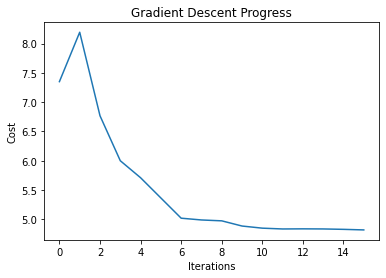

In [952]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

In [953]:
print(correctness)

[0.5, 0.725, 0.76, 0.765, 0.77, 0.79, 0.805, 0.8, 0.805, 0.805, 0.805, 0.81, 0.81, 0.815, 0.815, 0.815]


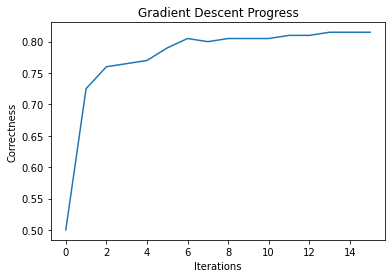

In [954]:
plt.plot(range(len(correctness)), correctness)
plt.xlabel('Iterations')
plt.ylabel('Correctness')
plt.title('Gradient Descent Progress')
plt.show()

### Train Naive Bayes Model

#### Continuous attributes

In [955]:
continuous = [
    'battery_power',
    'clock_speed',
    'fc',
    'int_memory',
    'm_dep',
    'mobile_wt',
    'pc',
    'px_height',
    'px_width',
    'ram',
    'sc_h',
    'sc_w',
    'talk_time'
]
uncontinuous = [
    'blue',
    'dual_sim',
    'four_g',
    'n_cores',
    'three_g',
    'touch_screen',
    'wifi'
]

In [956]:
naive_bayes = NaiveBayes(continuous, uncontinuous)
params = naive_bayes.fit(x_train, y_train)

#### Print parameters

In [957]:
print("Parameters of Naive Bayes Model: ", params)

Parameters of Naive Bayes Model:  {0: {'prior': 0.5, 'likelihood_con': {'battery_power': {'mean': 1169.195, 'var': 183449.47697499997}, 'clock_speed': {'mean': 1.48875, 'var': 0.6891484374999999}, 'fc': {'mean': 4.1675, 'var': 18.80194375}, 'int_memory': {'mean': 31.64625, 'var': 331.7836109375}, 'm_dep': {'mean': 0.51625, 'var': 0.08251093749999999}, 'mobile_wt': {'mean': 140.03625, 'var': 1283.7199359375}, 'pc': {'mean': 9.6225, 'var': 37.002493750000006}, 'px_height': {'mean': 593.73625, 'var': 171561.27418593748}, 'px_width': {'mean': 1200.53, 'var': 182335.3341}, 'ram': {'mean': 1233.5, 'var': 371179.87}, 'sc_h': {'mean': 12.345, 'var': 17.748475}, 'sc_w': {'mean': 5.59125, 'var': 17.5666734375}, 'talk_time': {'mean': 10.98, 'var': 29.9696}}, 'likelihood_uncon': {'blue': {'likelihoods': {0: 0.52125, 1: 0.47875}}, 'dual_sim': {'likelihoods': {0: 0.49625, 1: 0.50375}}, 'four_g': {'likelihoods': {0: 0.48875, 1: 0.51125}}, 'n_cores': {'likelihoods': {1: 0.1325, 2: 0.13375, 3: 0.12875,

### Train SVM Model

In [958]:
clf = svm.SVC()
clf.fit(x_train.values, y_train.values)

SVC()

## Test models

### Test Logistic Regression Model

In [959]:
accuracy_result_1 = logistic_regression.test(x_test.values, y_test.values)
print('Accuracy of Logistic Regression Model: {:.2f}' .format(accuracy_result_1))

Accuracy of Logistic Regression Model: 0.79


### Test Naive Bayes Model

In [960]:
accuracy_result_2 = naive_bayes.test(x_test, y_test)
print('Accuracy of Naive Bayes Model: {:.2f}' .format(accuracy_result_2))

Accuracy of Naive Bayes Model: 0.94


### Test SVM Model

In [961]:
accuracy_result_3 = clf.score(x_test.values, y_test.values)
print('Accuracy of SVM Model: {:.2f}' .format(accuracy_result_3))

Accuracy of SVM Model: 0.98


## Empirical Study

### Compare the three methods with respect to the classification accuracy on the test set

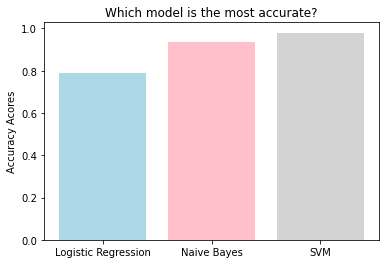

In [962]:
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
acc_scores = [accuracy_result_1, accuracy_result_2, accuracy_result_3]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("Accuracy Acores")
plt.title("Which model is the most accurate?")
plt.show()